In [3]:
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [289]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

## Answer

## (a) (5pts) 
Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

In [290]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
_ = model.fit(x_train,y_train)

In [291]:
predict = model.predict(x_test)

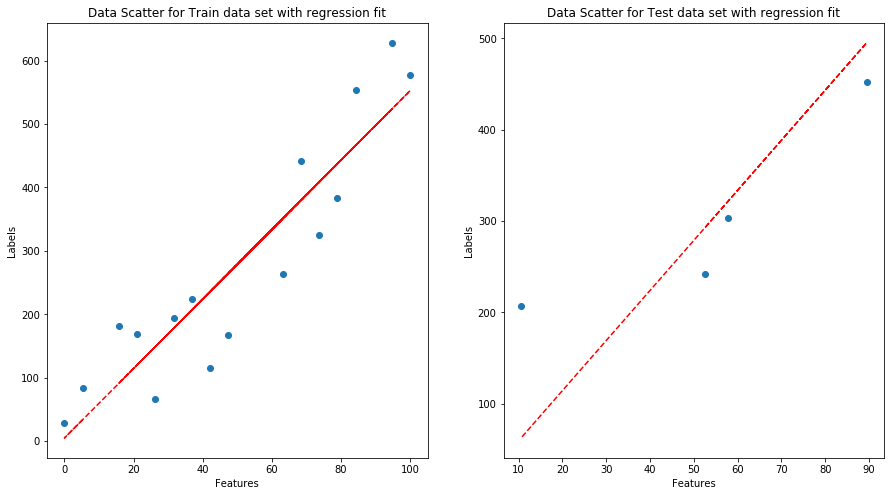

In [313]:
plt.subplot(121)
plt.scatter(x_train,y_train)
plt.title("Data Scatter for Train data set with regression fit")
plt.xlabel("Features")
_ = plt.ylabel("Labels")
_ = plt.plot(x_train,  model.predict(x_train), "r--")

plt.subplot(122)
plt.scatter(x_test,y_test)
plt.title("Data Scatter for Test data set with regression fit")
plt.xlabel("Features")
_ = plt.ylabel("Labels")
_ = plt.plot(x_test,  model.predict(x_test), "r--")

In [314]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predict)
print("Test MSE is : {}".format(mse))


Test MSE is : 6455.708453830028


In [315]:
full_x = np.concatenate((x_train,x_test))
full_y = np.concatenate((y_train,y_test))

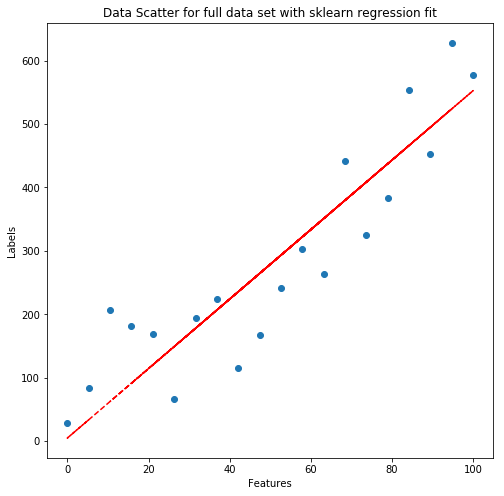

In [296]:
plt.scatter(full_x,full_y)
plt.title("Data Scatter for full data set with sklearn regression fit")
plt.xlabel("Features")
_ = plt.ylabel("Labels")
_ = plt.plot(full_x,  model.predict(full_x), "r--")

## (b) (5pts) 
Fit polynomial models of degrees 1, 2, 3, and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

MSE on test set (deg: 1) = 6455.708453830018
MSE on test set (deg: 2) = 4683.309906329018
MSE on test set (deg: 3) = 4602.202716060094
MSE on test set (deg: 5) = 6599.1329527980215


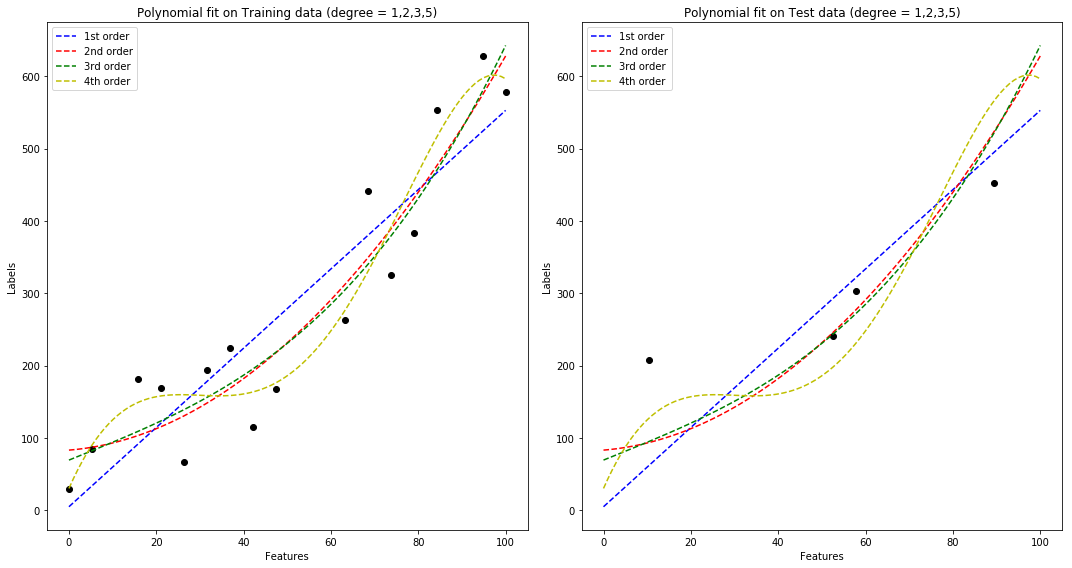

In [329]:
import warnings
warnings.filterwarnings('ignore')

#reshape x and y sets
x_values = np.array(x_train.reshape(-1))
# x_values = np.sort(x_values)
y_values = np.array(y_train.reshape(-1))

# get coefficients for p2,p3,5
c1 = poly.polyfit(x_values,y_values,1)
c2 = poly.polyfit(x_values,y_values,2)
c3 = poly.polyfit(x_values,y_values,3)
c5 = poly.polyfit(x_values,y_values,5)

# make predictions on test set for degrees 1,2,3, and 5

y1 = c1[1]*x_test + c1[0]
y2 = c2[2]*(x_test**2) + c2[1]*x_test + c2[0]
y3 = c3[3]*(x_test**3) + c3[2]*(x_test**2) + c3[1]*x_test + c3[0]
y5 = c5[5]*(x_test**5) + c5[4]*(x_test**4) + c5[3]*(x_test**3) + c5[2]*(x_test**2) + c5[1]*x_test + c5[0]

# mean squared error calculations
mse1 = mean_squared_error(y_test, y1)
mse2 = mean_squared_error(y_test, y2)
mse3 = mean_squared_error(y_test, y3)
mse5 = mean_squared_error(y_test, y5)

print("MSE on test set (deg: 1) = " + str(mse1))
print("MSE on test set (deg: 2) = " + str(mse2))
print("MSE on test set (deg: 3) = " + str(mse3))
print("MSE on test set (deg: 5) = " + str(mse5))

from numpy.polynomial import Polynomial
fig_size = [15,8]

plt.subplot(121)
_ = plt.rcParams["figure.figsize"] = fig_size
plt.scatter(x_train,y_train, color="black")
plt.title("Polynomial fit on Training data (degree = 1,2,3,5)")
plt.xlabel("Features")
_ = plt.ylabel("Labels")

#reshape x and y sets
x_values = np.array(x_train.reshape(-1))
# x_values = np.sort(x_values)
y_values = np.array(y_train.reshape(-1))

# fit polynomials
p1 = Polynomial.fit(x_values,y_values,1)
p2 = Polynomial.fit(x_values,y_values,2)
p3 = Polynomial.fit(x_values,y_values,3)
p5 = Polynomial.fit(x_values,y_values,5)

# create plots
_ = plt.plot(*p1.linspace(), "b--", label=r'1st order')
_ = plt.plot(*p2.linspace(), "r--", label=r'2nd order')
_ = plt.plot(*p3.linspace(), "g--", label=r'3rd order')
_ = plt.plot(*p5.linspace(), "y--", label=r'4th order')
_ = plt.legend()

# add legend

# plot predictions
plt.subplot(122)
fig_size = [15,8]
_ = plt.rcParams["figure.figsize"] = fig_size
plt.scatter(x_test,y_test, color="black")
plt.title("Polynomial fit on Test data (degree = 1,2,3,5)")
plt.xlabel("Features")
_ = plt.ylabel("Labels")

# create plots
_ = plt.plot(*p1.linspace(), "b--", label=r'1st order')
_ = plt.plot(*p2.linspace(), "r--", label=r'2nd order')
_ = plt.plot(*p3.linspace(), "g--", label=r'3rd order')
_ = plt.plot(*p5.linspace(), "y--", label=r'4th order')
_ = plt.legend()

_ = plt.tight_layout()
# add legend

## (c) (5pts) 
Which model performed the best? Explain using the bias-variance tradeoff.

#### Answer:

The model that performed the best on the test set was the 3rd degree polynomial model. In this case, as the complexity of our model increased, the bias on the *training set* increased while the variance decreased. We can see that in this case, the 3rd degree polynomial struck the best balance between bias and variance as it was able to best explain the variability in the *test set* while providing the lowest mean squared error out of the four different models.

# Question 1. Data Exploration (23pts)
Use the following code to import the dataset.

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

## (a)
(2pt) Print the shape (number of rows and columns) of the data matrix and show the first 5 rows.


In [335]:
print(data.shape)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## (b)
(4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers. 

In [402]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [409]:
summary = data.describe()
summary = summary.iloc[[4,6]]

print(summary)

# compute interquartile
IQR_tv = summary.iloc[1][0] - summary.iloc[0][0]
IQR_radio = summary.iloc[1][1] - summary.iloc[0][1]
IQR_news = summary.iloc[1][2] - summary.iloc[0][2]
IQR_sales = summary.iloc[1][3] - summary.iloc[0][3]


# compute cutoffs for outliers
cutoff_tv = summary.iloc[1][0] + 1.5*IQR_tv
cutoff_radio = summary.iloc[1][1] + 1.5*IQR_radio
cutoff_news = summary.iloc[1][2] + 1.5*IQR_news
cutoff_sales = summary.iloc[1][3] + 1.5*IQR_sales

          TV   Radio  Newspaper   Sales
25%   74.375   9.975      12.75  10.375
75%  218.825  36.525      45.10  17.400


Cutoffs for outliers: 
TV cutoff: 	$435.50
Radio cutoff: 	$76.35
News cutoff: 	$93.62
Sales cutoff: 	$27.94


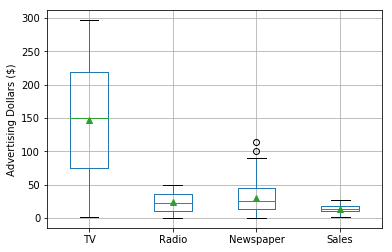

In [418]:
ax = data.boxplot(showmeans=True)
_ = ax.set_ylabel("Advertising Dollars ($)")

# determine cutoff values for outliers
summary = data.describe()

print("Cutoffs for outliers: ")
print("TV cutoff: \t${:.2f}".format(cutoff_tv))
print("Radio cutoff: \t${:.2f}".format(cutoff_radio))
print("News cutoff: \t${:.2f}".format(cutoff_news))
print("Sales cutoff: \t${:.2f}".format(cutoff_sales))

## (c) 
(4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

## (d)
(4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

Now split the data randomly into a training and test set (keep one third of the data for test).

## (e)
(4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error.

## (f)
(3pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

## (g) 
(2pts) Report the coefficients obtained by your model.

# Question 2. Regression with Feature Selection and Outlier Detection (20pts)

In this problem, we will build a predictive model to estimate the market price using the Dow-Jones index (https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average). To simplify the problem, we will use previous weeks' price and volume.

In [8]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X_df = df[[
        u'open', u'high', u'low', u'close',
        u'percent_change_price',
        u'volume', 
        u'previous_weeks_volume',
        u'percent_change_volume_over_last_wk']]

feature_name = list(X_df.columns.values)

# check the first 5 rows of data loaded
pd.DataFrame.head(X_df)

,open,high,low,close,percent_change_price,volume,previous_weeks_volume,percent_change_volume_over_last_wk
1,$16.71,$16.71,$15.64,$15.97,-4.428490,242963398,239655616.0,1.380223
2,$16.19,$16.38,$15.60,$15.79,-2.470660,138428495,242963398.0,-43.024959
3,$15.87,$16.63,$15.82,$16.13,1.638310,151379173,138428495.0,9.355500
4,$16.18,$17.39,$16.18,$17.14,5.933250,154387761,151379173.0,1.987452
5,$17.33,$17.48,$16.97,$17.37,0.230814,114691279,154387761.0,-25.712195


### Forward/ backward feature selection.

(a) (3pts) Calculate the MSE of the training set using linear regression.

(b) (3pts) Find the three most significant factors using (1) forward feature selection and (2) backward feature selection. Please install and use MLXTEND package for above feature selections (https://anaconda.org/conda-forge/mlxtend). You may find the following link helpful: https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#example-5-sequential-feature-selection-for-regression. Please set the cross-validation parameter to 3 (cv=3).



In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

(c) (2pt) Are the three most significant features found using forward and backward feature selection the same?

### Huber Loss function and outlier

In the second part, we will fit a linear model to the data, using a Huber loss function rather than the L2 norm usually used in OLS. sklearn has a nice API you can use: [http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor). For this problem, we will consider only one feature: "percent\_change\_price".

In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
stock = df[["percent_change_price", "next_weeks_open"]]
stock = stock.dropna()
stock = stock.values[1:]
stock[:, 1] = [i.split("$")[1] for i in stock[:, 1]]
stock = stock.astype('float')
stock[:, 0] = (stock[:, 0] - np.mean(stock[:, 0], axis=0))/np.std(stock[:, 0], axis=0)

X = stock[:,:1]
y = stock[:, 1]

X_train = X[:400,]
y_train = y[:400]

X_test = X[400:,]
y_test = y[400:,]

(d) (2pts) Calculate the MSE using linear regression (linear_model.LinearRegression) using this single feature. Please do not use any regularization coefficient (set $\lambda=0$).

(e) (2pts) Calculate the MSE using Huber regression (linear_model.HuberRegressor) and compare with the result obtained in (d).

Now we purposefully insert an outlier into the training set. Please note that this is simply for academic purpose.

In [1]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 10000.0

(f) (3pts) Explain the difference in predictive performance of the two models in these two scenarios: with and without an outlier.

(g) (5pts) As you have previously done, please create two models, logistric regression and huber regression, but using the new target vector during training. Please print the test and train MSE (5 pts).

## Answer

# Question 3. Sampling (6pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (2pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

# Question 4. Principal Component Analysis (11pts)

Use the following code to read in data of US Imports.

In [7]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.iloc[:5,:5]

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton"
Country,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0
Algeria,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0


(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

(d) (3pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

## Answer

# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

## Answer